## Predicting the percentage of an student based on the number of study hours

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing required packages

In [2]:
#These Packages are used for Data Analysis
import pandas as pd
import numpy as np 

#These Packages are used for Pre-Processing out Data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
 
#This Package is used for creating Models 
from sklearn.linear_model import LinearRegression 

#This Package is used for Valuation Purpose
from sklearn import metrics 

#These Packages are used for Visualization 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

## Reading the data

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully...")

Data imported successfully...


## Viewing the data

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Let's check for the data types of all the columns

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

## Let's check for missing values

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**From the output above, we can clearly see that there are no missing values in our data.**

## Let's view some basic statistical details of the data

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Let's Check for Outliers

<AxesSubplot:ylabel='Hours'>

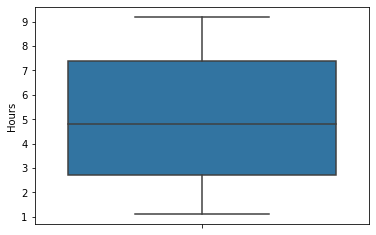

In [8]:
sns.boxplot(y=data['Hours'])

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

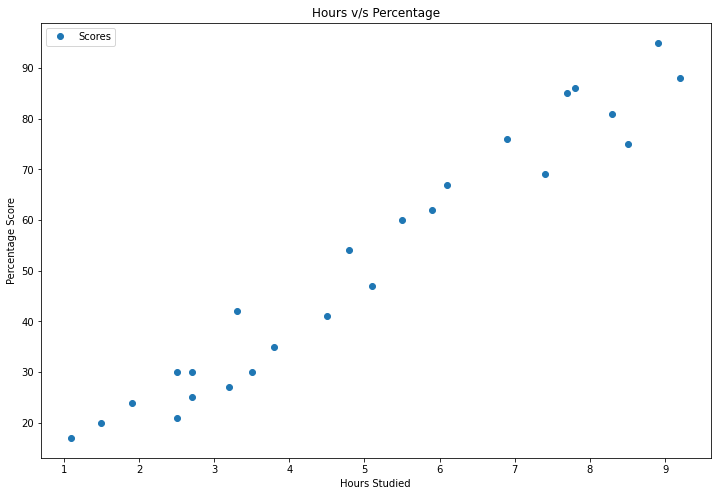

In [9]:
data.plot(x='Hours', y='Scores', style='o', figsize = (12,8))  
plt.title('Hours v/s Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Preprocrssing our data

In [10]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [11]:
scaler = StandardScaler()

In [12]:
Scaled_data = StandardScaler().fit(X).transform(X)

**Let's Split the data into Training set and Validation set**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

### Training the Algorithm

In [14]:
Linear_Regressor = LinearRegression()  
Linear_Regressor.fit(X_train, y_train) 

print("Training completed....")

Training completed....


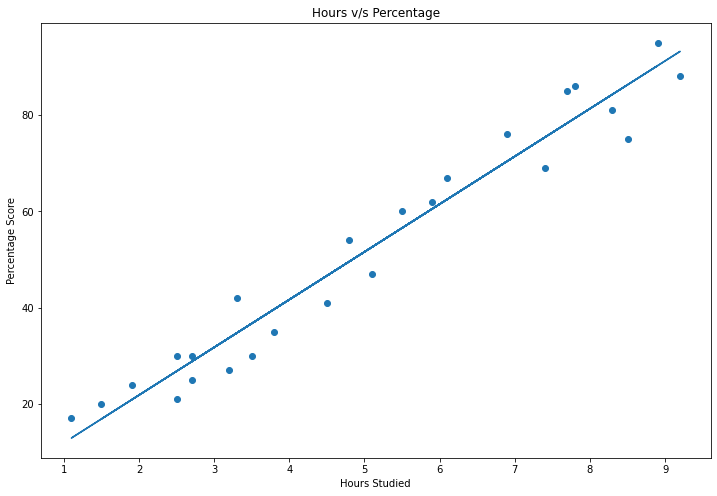

In [15]:
# Plotting the regression line
trend = Linear_Regressor.coef_*X + Linear_Regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(12,8))
plt.scatter(X, Y)
plt.plot(X, trend)
plt.title('Hours v/s Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

## Making Prediction

In [16]:
y_pred = Linear_Regressor.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**We can also test on our own data**

In [18]:
hours = [[9.25]]
pred = Linear_Regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(min(np.round(pred[0],2),100)))

No of Hours = 9.25
Predicted Score = 93.69


## You can try here your own Data

In [19]:
hours = [[ float(input()) ]]
pred = Linear_Regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(min(np.round(pred[0],2),100)))

12
No of Hours = 12.0
Predicted Score = 100


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [20]:
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred, squared=True)) 
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False)) 
print('R Square               :', metrics.r2_score(y_test, y_pred) )

Mean Absolute Error    : 4.183859899002982
Mean Squared Error     : 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R Square               : 0.9454906892105354
